In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dados.csv')

In [4]:
df

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0     5008804       1        1             1           1      0      0   
1     5008806       1        1             1           0      0      0   
2     5008808       0        0             1           0      1      1   
3     5008812       0        0             1           0      0      0   
4     5008815       1        1             1           1      1      1   
...       ...     ...      ...           ...         ...    ...    ...   
9704  5148694       0        0             0           0      0      0   
9705  5149055       0        0             1           1      1      0   
9706  5149729       1        1             1           0      0      0   
9707  5149838       0        0             1           0      1      1   
9708  5150337       1        0             1           0      0      0   

      Unemployed  Num_children  Num_family  Account_length  Total_income  \
0              0             0           2              15      427500.0   
1              0             0           2              29      112500.0   
2              0             0           1               4      270000.0   
3              1             0           1              20      283500.0   
4              0             0           2               5      270000.0   
...          ...           ...         ...             ...           ...   
9704           0             0           2              20      180000.0   
9705           0             0           2              19      112500.0   
9706           0             0           2              21       90000.0   
9707           0             0           2              32      157500.0   
9708           0             0           1              13      112500.0   

            Age  Years_employed           Income_type  \
0     32.868574       12.435574               Working   
1     58.793815        3.104787               Working   
2     52.321403        8.353354  Commercial associate   
3     61.504343        0.000000             Pensioner   
4     46.193967        2.105450               Working   
...         ...             ...                   ...   
9704  56.400884        0.542106             Pensioner   
9705  43.360233        7.375921  Commercial associate   
9706  52.296762        4.711938               Working   
9707  33.914454        3.627727             Pensioner   
9708  25.155890        3.266323               Working   

                     Education_type         Family_status  \
0                  Higher education        Civil marriage   
1     Secondary / secondary special               Married   
2     Secondary / secondary special  Single / not married   
3                  Higher education             Separated   
4                  Higher education               Married   
...                             ...                   ...   
9704  Secondary / secondary special        Civil marriage   
9705  Secondary / secondary special               Married   
9706  Secondary / secondary special               Married   
9707               Higher education               Married   
9708  Secondary / secondary special  Single / not married   

             Housing_type Occupation_type  Target  
0        Rented apartment           Other       1  
1       House / apartment  Security staff       0  
2       House / apartment     Sales staff       0  
3       House / apartment           Other       0  
4       House / apartment     Accountants       0  
...                   ...             ...     ...  
9704  Municipal apartment        Laborers       1  
9705    House / apartment           Other       1  
9706    House / apartment           Other       1  
9707    House / apartment  Medicine staff       1  
9708     Rented apartment        Laborers       1  

[9709 rows x 20 columns]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

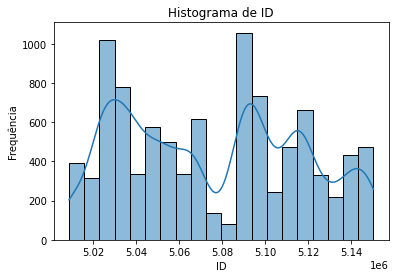

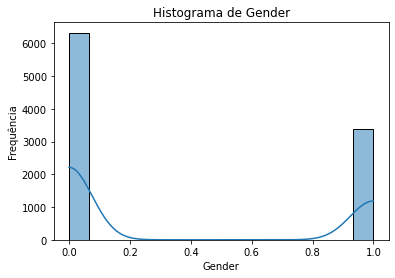

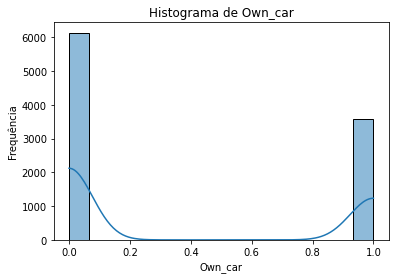

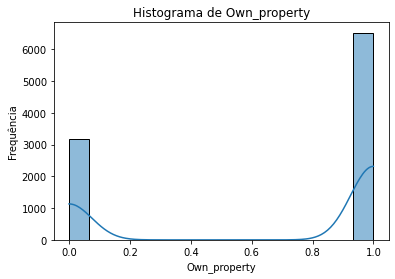

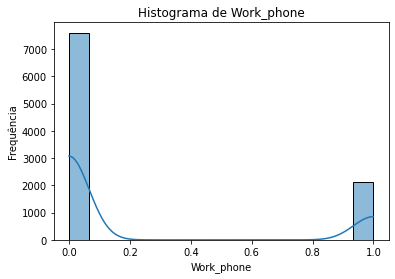

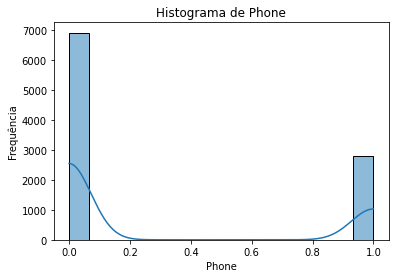

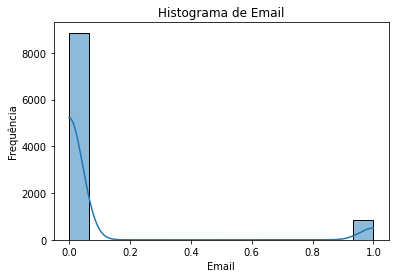

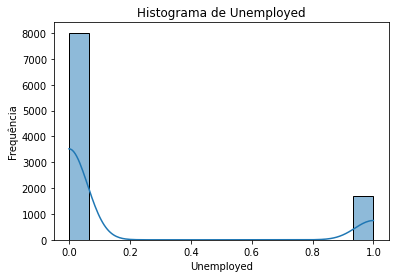

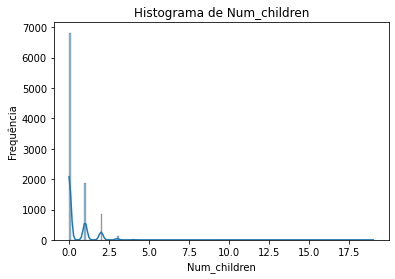

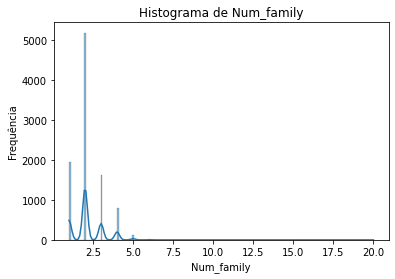

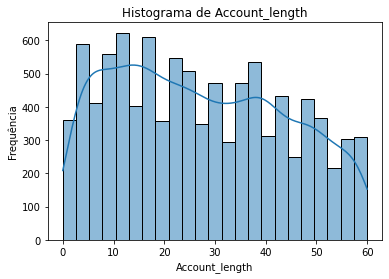

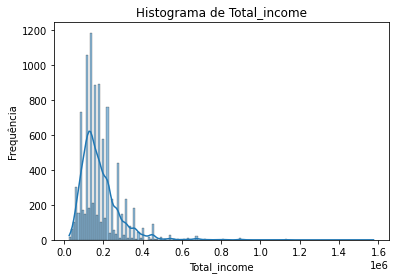

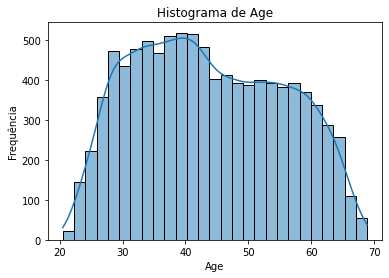

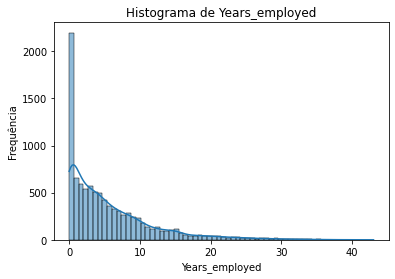

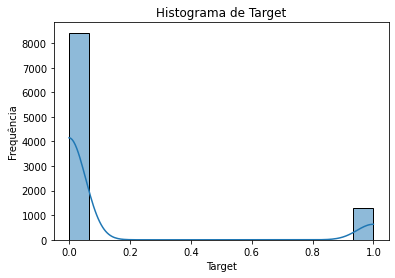

In [6]:
# Histogramas para colunas numéricas
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

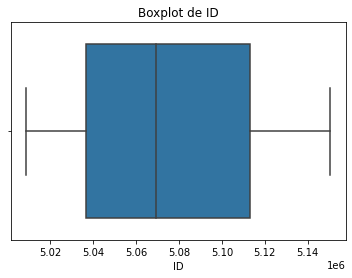

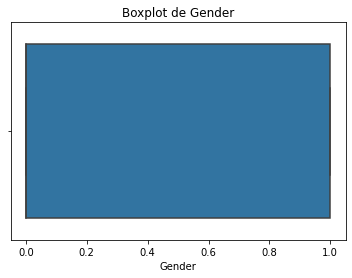

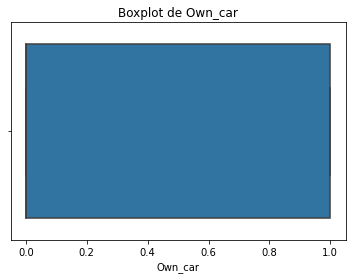

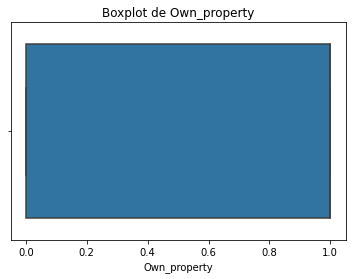

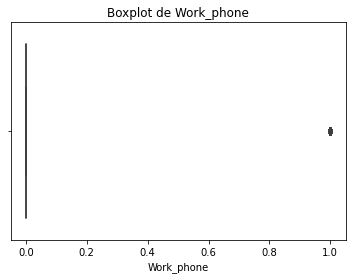

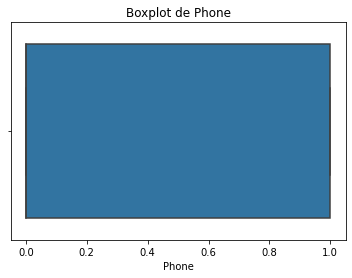

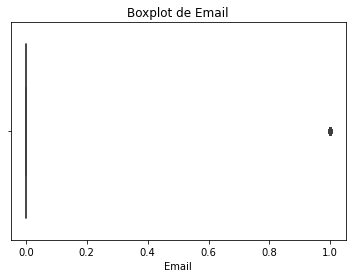

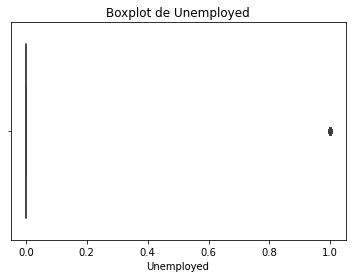

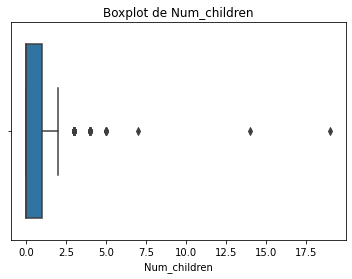

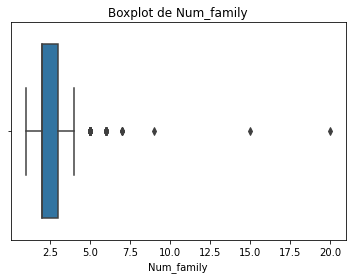

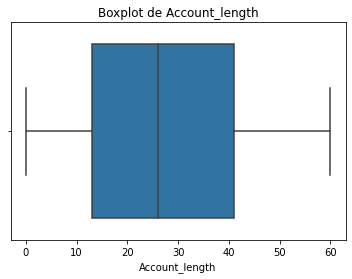

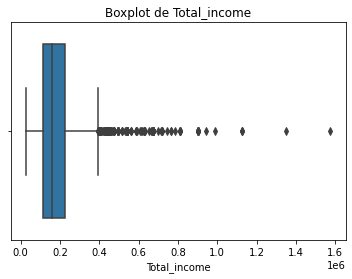

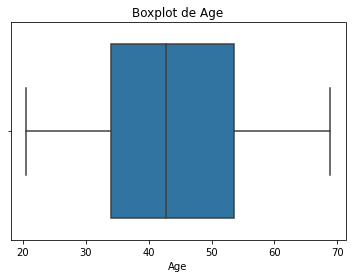

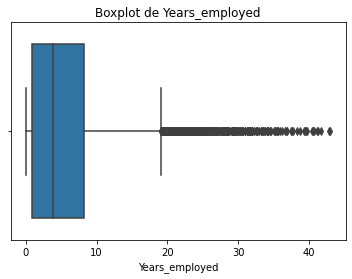

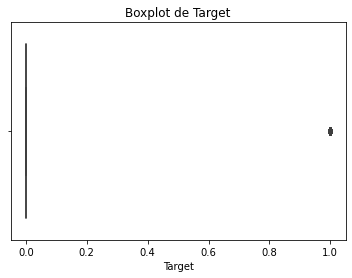

In [7]:
# Boxplots para colunas numéricas
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


Matriz de Correlação:


C:\Users\ZM155KC\AppData\Local\Temp\ipykernel_27700\3528545853.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


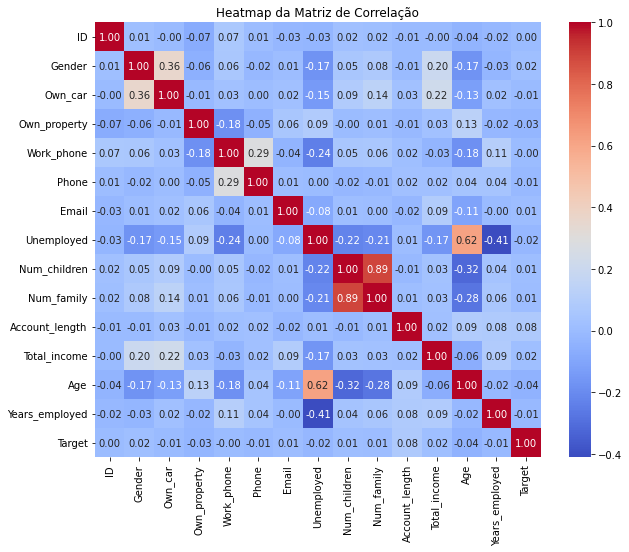

In [8]:
print("\nMatriz de Correlação:")
correlation_matrix = df.corr()
#print(correlation_matrix)

# Heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap da Matriz de Correlação')
plt.show()

In [9]:
df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

In [10]:
df['Income_type'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [11]:
def Income_type_para_num(entrada_Income_type):
    if( entrada_Income_type == 'Working'): return 1;
    if( entrada_Income_type == 'Commercial associate'): return 2;
    if( entrada_Income_type == 'Pensioner'): return 3;
    if( entrada_Income_type == 'State servant'): return 4;
    if( entrada_Income_type == 'Student'): return 5;


df['Income_type_num'] = df['Income_type'].apply(Income_type_para_num)

In [12]:
df['Education_type'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [13]:
def Education_type_para_num(entrada_Education_type):
    if( entrada_Education_type == 'Higher education'): return 1;
    if( entrada_Education_type == 'Secondary / secondary special'): return 2;
    if( entrada_Education_type == 'Incomplete higher'): return 3;
    if( entrada_Education_type == 'Lower secondary'): return 4;
    if( entrada_Education_type == 'Academic degree'): return 5;


df['Education_type_num'] = df['Education_type'].apply(Education_type_para_num)

In [14]:
df['Family_status'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [15]:
def Family_status_para_num(entrada_Family_status):
    cl_num = 0
    for item in df['Family_status'].unique():
        cl_num += 1
        if(entrada_Family_status == item):
            return cl_num;


df['Family_status_num'] = df['Family_status'].apply(Family_status_para_num)

In [16]:
df['Housing_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [17]:
def Housing_type_para_num(entrada_Housing_type):
    cl_num = 0
    for item in df['Housing_type'].unique():
        cl_num += 1
        if(entrada_Housing_type == item):
            return cl_num;


df['Housing_types_num'] = df['Housing_type'].apply(Housing_type_para_num)

In [18]:
df['Occupation_type'].unique()

array(['Other', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [19]:
def Occupation_type_para_num(entrada_Occupation_type):
    cl_num = 0
    for item in df['Occupation_type'].unique():
        cl_num += 1
        if(entrada_Occupation_type == item):
            return cl_num;


df['Occupation_type_num'] = df['Occupation_type'].apply(Occupation_type_para_num)

In [20]:
# Convert categorical features to numerical using LabelEncoder
#le = LabelEncoder()
#categorical_columns = ['Income_type', 'Education_type', 'Family_status', 'Housing_type',
#       'Occupation_type']
#for col in categorical_columns:
#    df[col] = le.fit_transform(df[col])

In [21]:
df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target', 'Income_type_num', 'Education_type_num', 'Family_status_num',
       'Housing_types_num', 'Occupation_type_num'],
      dtype='object')

In [22]:
df_para_processar = df[['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Age', 'Years_employed', 'Income_type_num', 'Education_type_num', 'Family_status_num',
       'Housing_types_num', 'Occupation_type_num','Target']]

In [23]:
df_para_processar

Gender  Own_car  Own_property  Work_phone  Phone  Email  Unemployed  \
0          1        1             1           1      0      0           0   
1          1        1             1           0      0      0           0   
2          0        0             1           0      1      1           0   
3          0        0             1           0      0      0           1   
4          1        1             1           1      1      1           0   
...      ...      ...           ...         ...    ...    ...         ...   
9704       0        0             0           0      0      0           0   
9705       0        0             1           1      1      0           0   
9706       1        1             1           0      0      0           0   
9707       0        0             1           0      1      1           0   
9708       1        0             1           0      0      0           0   

      Num_children  Num_family  Account_length        Age  Years_employed  \
0                0           2              15  32.868574       12.435574   
1                0           2              29  58.793815        3.104787   
2                0           1               4  52.321403        8.353354   
3                0           1              20  61.504343        0.000000   
4                0           2               5  46.193967        2.105450   
...            ...         ...             ...        ...             ...   
9704             0           2              20  56.400884        0.542106   
9705             0           2              19  43.360233        7.375921   
9706             0           2              21  52.296762        4.711938   
9707             0           2              32  33.914454        3.627727   
9708             0           1              13  25.155890        3.266323   

      Income_type_num  Education_type_num  Family_status_num  \
0                   1                   1                  1   
1                   1                   2                  2   
2                   2                   2                  3   
3                   3                   1                  4   
4                   1                   1                  2   
...               ...                 ...                ...   
9704                3                   2                  1   
9705                2                   2                  2   
9706                1                   2                  2   
9707                3                   1                  2   
9708                1                   2                  3   

      Housing_types_num  Occupation_type_num  Target  
0                     1                    1       1  
1                     2                    2       0  
2                     2                    3       0  
3                     2                    1       0  
4                     2                    4       0  
...                 ...                  ...     ...  
9704                  3                    5       1  
9705                  2                    1       1  
9706                  2                    1       1  
9707                  2                   14       1  
9708                  1                    5       1  

[9709 rows x 18 columns]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,confusion_matrix

In [32]:
X = df_para_processar.iloc[:, :-1]  # características
y = df_para_processar.iloc[:, -1]   # rótulo

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escale os dados (normalização)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie o modelo kNN com k vizinhos
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Treine o modelo
knn.fit(X_train, y_train)

# Faça previsões
y_pred = knn.predict(X_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo kNN: {accuracy:.2f}')

Acurácia do modelo kNN: 0.84


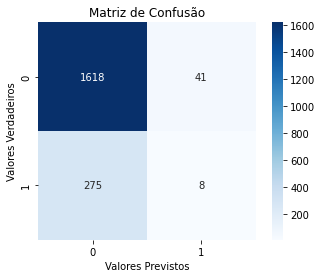

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1659
           1       0.16      0.03      0.05       283

    accuracy                           0.84      1942
   macro avg       0.51      0.50      0.48      1942
weighted avg       0.75      0.84      0.79      1942



In [33]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão com Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


# Para uma visão mais detalhada, incluindo precisão, recall e F1-Score para cada classe
print(classification_report(y_test, y_pred))

In [34]:
from xgboost import XGBClassifier

In [35]:
# Suponha que 'df' é o seu DataFrame e que a última coluna é o rótulo
X = df_para_processar.iloc[:, :-1]  # características
y = df_para_processar.iloc[:, -1]   # rótulo

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie o modelo XGBoost
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Treine o modelo
xgb_model.fit(X_train, y_train)

# Faça previsões
y_pred = xgb_model.predict(X_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo XGBoost: {accuracy:.2f}')

Acurácia do modelo XGBoost: 0.85


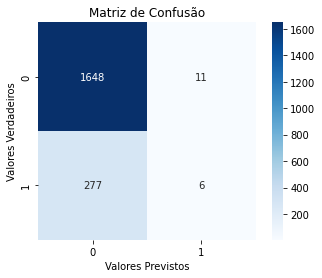

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1659
           1       0.35      0.02      0.04       283

    accuracy                           0.85      1942
   macro avg       0.60      0.51      0.48      1942
weighted avg       0.78      0.85      0.79      1942



In [36]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão com Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


# Para uma visão mais detalhada, incluindo precisão, recall e F1-Score para cada classe
print(classification_report(y_test, y_pred))

In [37]:
# Suponha que a última coluna do DataFrame seja o rótulo
X = df_para_processar.iloc[:, :-1]  # características
y = df_para_processar.iloc[:, -1]   # rótulo

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleção de características usando o teste estatístico ANOVA F-value
# Escolha 'k' para selecionar as 'k' melhores características
k = 8
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Treine um modelo de classificação com as características selecionadas
#k = 5
#model = KNeighborsClassifier(n_neighbors=k)
model = XGBClassifier(objective='binary:logistic', random_state=42)
#model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Faça previsões e avalie o modelo
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo com as {k} melhores características: {accuracy:.2f}')

# Para visualizar quais características foram selecionadas
selected_features = pd.DataFrame(selector.inverse_transform(X_train_selected),
                                 index=X_train.index,
                                 columns=X_train.columns)
selected_columns = selected_features.columns[selected_features.var() != 0]
print(f'Características selecionadas: {list(selected_columns)}')

Acurácia do modelo com as 8 melhores características: 0.84
Características selecionadas: ['Gender', 'Own_property', 'Unemployed', 'Num_children', 'Num_family', 'Account_length', 'Age', 'Occupation_type_num']


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [39]:
# Build the Random Forest model
model1 = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Build the Decision Tree model
model2 = DecisionTreeClassifier()

# Fit the model on the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
# Build the Logisitc Regression model
model3 = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model3.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
# Build the Gradient Boosting model
model4 = GradientBoostingClassifier()

# Fit the model on the training data
model4.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
# Build the SVM (Support Vector Machines)
model5 = SVC()

# Fit the model on the training data
model5.fit(X_train, y_train)

SVC()

In [44]:
# Make predictions on the test data and apply the model to pridict the values from the test attributes values
y_pred = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

#all predictions
model_predictions = [y_pred,y_pred2,y_pred3,y_pred4,y_pred5]

In [45]:
# Calculate the average of the predicted values
average_predictions = np.mean(model_predictions, axis=0)

In [46]:
#Average Class Classification Predictions
average_class_predictions = np.round(average_predictions).astype(int)

In [47]:
print("Accuracy for Credit Card Classification: ",accuracy_score(y_test,average_class_predictions)*100)

Accuracy for Credit Card Classification:  85.42739443872297


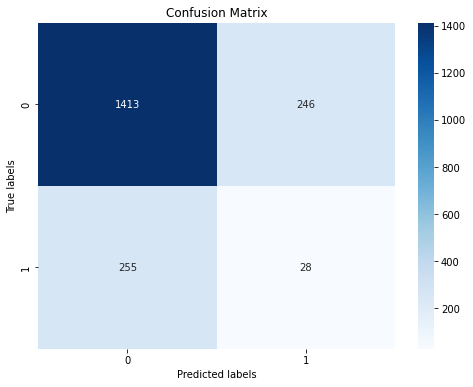

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.20      0.00      0.01       283

    accuracy                           0.85      1942
   macro avg       0.53      0.50      0.46      1942
weighted avg       0.76      0.85      0.79      1942



In [48]:
#confusion Matrix
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))

In [49]:
from pycaret.classification import *

In [50]:
# Divida os dados manualmente em conjuntos de treinamento e teste
train_df, test_df = train_test_split(df_para_processar, test_size=0.2, random_state=123)

# Inicialize o ambiente PyCaret com os conjuntos de dados de treino e teste especificados
clf1 = setup(data=train_df, target=train_df.columns[-1], test_data=test_df, session_id=123)

In [53]:
best_model = compare_models(sort='F1')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

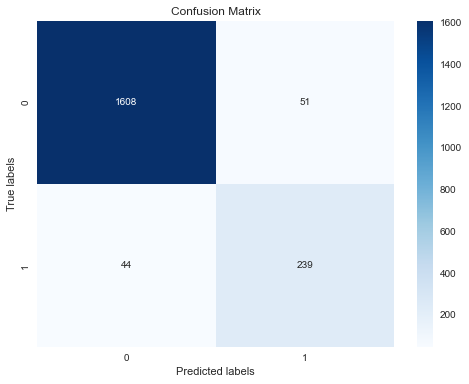

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1659
           1       0.82      0.84      0.83       283

    accuracy                           0.95      1942
   macro avg       0.90      0.91      0.90      1942
weighted avg       0.95      0.95      0.95      1942



In [52]:
y_pred = best_model.predict(X_test)
#confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))

In [74]:
# Compare todos os modelos e selecione os três melhores com base no F1-Score
top3_models = compare_models(sort='F1', n_select=3)

# Crie um modelo ensemble usando os três melhores modelos
blended_model = blend_models(estimator_list=top3_models)

# Faça previsões com o modelo ensemble
predictions = predict_model(blended_model, data=X_test)

Processing:   0%|          | 0/67 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [55]:
predictions

Gender  Own_car  Own_property  Work_phone  Phone  Email  Unemployed  \
7591       0        0             1           0      1      0           0   
6760       1        0             1           0      0      0           0   
8782       1        1             0           1      1      0           0   
4656       0        1             1           0      0      0           0   
1915       1        1             1           0      0      0           0   
...      ...      ...           ...         ...    ...    ...         ...   
8938       0        0             1           0      1      0           1   
6187       0        0             0           0      0      0           1   
6627       0        0             1           0      1      0           0   
6114       1        1             1           0      0      0           0   
2273       0        1             1           1      0      0           0   

      Num_children  Num_family  Account_length        Age  Years_employed  \
7591             0           2              17  46.670364        3.860449   
6760             1           3              23  33.640663       10.677837   
8782             2           4              40  33.758392        5.960423   
4656             0           2              39  58.087437        9.968719   
1915             1           2              55  42.903004        0.654360   
...            ...         ...             ...        ...             ...   
8938             0           2              15  64.806259        0.000000   
6187             0           2              19  57.088100        0.000000   
6627             1           3              16  36.178703        7.679829   
6114             0           2              40  37.772163        7.343067   
2273             0           2               9  34.174557        5.297850   

      Income_type_num  Education_type_num  Family_status_num  \
7591                2                   1                  2   
6760                2                   2                  2   
8782                1                   2                  2   
4656                1                   2                  2   
1915                2                   2                  3   
...               ...                 ...                ...   
8938                3                   1                  2   
6187                3                   2                  2   
6627                1                   2                  1   
6114                2                   1                  2   
2273                4                   1                  2   

      Housing_types_num  Occupation_type_num  prediction_label  \
7591                  2                    4                 0   
6760                  2                    8                 0   
8782                  2                    7                 0   
4656                  2                    6                 0   
1915                  2                    1                 0   
...                 ...                  ...               ...   
8938                  2                    1                 1   
6187                  2                    1                 0   
6627                  4                    3                 0   
6114                  2                    7                 0   
2273                  4                    1                 0   

      prediction_score  
7591            0.8934  
6760            0.8924  
8782            0.8600  
4656            0.5909  
1915            0.8388  
...                ...  
8938            0.5222  
6187            0.9226  
6627            0.9862  
6114            0.9113  
2273            0.6014  

[1942 rows x 19 columns]

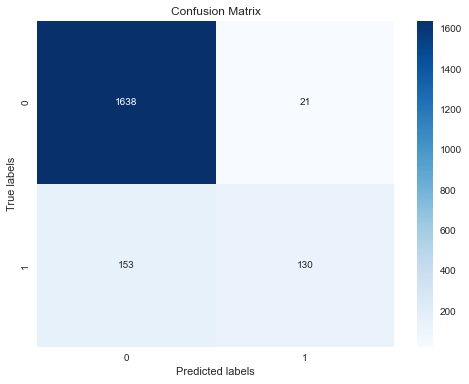

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1659
           1       0.82      0.84      0.83       283

    accuracy                           0.95      1942
   macro avg       0.90      0.91      0.90      1942
weighted avg       0.95      0.95      0.95      1942



In [75]:
#confusion Matrix
cm = confusion_matrix(y_test, predictions['prediction_label'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))